# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
#Explored the CSV data manually opening the files in a text editor

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Read the CSV files
files = glob.glob('states*.csv')

df_list = []
for filename in files:
    data = pd.read_csv(filename)
    df_list.append(data)

df = pd.concat(df_list, ignore_index=True)

print(df.head())


   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
print(df.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
print(df['Income'].head(10))
df['Income'] = df['Income'].astype(str).str.replace(r'[\$,]', '', regex=True)
df.Income = pd.to_numeric(df.Income)
print(df['Income'].head(10))

0    $59,125.27 
1    $46,296.81 
2    $51,805.41 
3    $47,328.08 
4    $55,874.52 
5    $63,488.92 
6    $63,488.92 
7    $55,602.97 
8    $72,866.01 
9    $64,493.77 
Name: Income, dtype: object
0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
6    63488.92
7    55602.97
8    72866.01
9    64493.77
Name: Income, dtype: float64


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [6]:
print(df.GenderPop.head(10))
gender_split = df.GenderPop.str.split('_', expand=True)
df['Men'] = gender_split[0]
df['Women'] = gender_split[1]
print(df['Men'].head(10))
print(df['Women'].head(10))

0        510388M_543273F
1      2322409M_2455167F
2        423477M_419713F
3      3167756M_3331859F
4    13171316M_13367298F
5      1459229M_1444150F
6      1459229M_1444150F
7        308573M_318031F
8      4060948M_4195682F
9      3487725M_3497739F
Name: GenderPop, dtype: object
0      510388M
1     2322409M
2      423477M
3     3167756M
4    13171316M
5     1459229M
6     1459229M
7      308573M
8     4060948M
9     3487725M
Name: Men, dtype: object
0      543273F
1     2455167F
2      419713F
3     3331859F
4    13367298F
5     1444150F
6     1444150F
7      318031F
8     4195682F
9     3497739F
Name: Women, dtype: object


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [7]:
df['Men'] = df.Men.str.replace('M', '')
df['Women'] = df.Women.str.replace('F', '')

df['Men'] = pd.to_numeric(df.Men)
df['Women'] = pd.to_numeric(df.Women)
print(df.head(10))

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   
5           5            Utah   2903379   13.47%  79.41%   1.02%  1.08%   
6           0            Utah   2903379   13.47%  79.41%   1.02%  1.08%   
7           1         Vermont    626604    1.61%  93.98%   0.98%  0.30%   
8           2        Virginia   8256630    8.01%  63.27%  20.18%  0.21%   
9           3      Washington   6985464   11.14%  72.04%   3.38%  1.41%   

   Asian Pacific    Income            GenderPop       Men       Women  
0  3.25%   0.04%  59125.27      510388M_543273F    510388    543273.0  
1  1.25%   0.05%  46296.81    

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

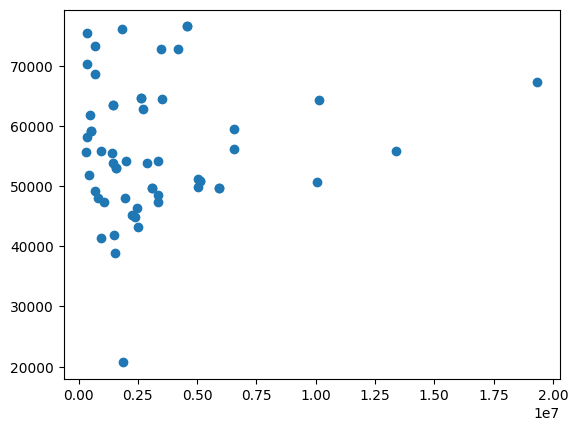

In [8]:
plt.scatter(df['Women'], df['Income'])
plt.show()


9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [9]:
print(df['Women'])

df['Women'] = df['Women'].fillna(df['TotalPop'] - df['Men'])
print(df['Women'])

0       543273.0
1      2455167.0
2       419713.0
3      3331859.0
4     13367298.0
5      1444150.0
6      1444150.0
7       318031.0
8      4195682.0
9      3497739.0
10      937789.0
11     2890732.0
12           NaN
13     3455936.0
14     5038598.0
15     2727005.0
16     1536358.0
17     3081445.0
18     3081445.0
19           NaN
20      939759.0
21     1390901.0
22      670717.0
23     4561386.0
24     5913084.0
25     1942789.0
26     1990780.0
27     6534215.0
28     1869213.0
29      543273.0
30     4561386.0
31     1051703.0
32    10131373.0
33     5049925.0
34      353677.0
35     5913084.0
36     5123362.0
37      696428.0
38      806083.0
39     6556862.0
40     3333382.0
41     1558931.0
42     1558931.0
43     1453125.0
44     2233145.0
45     2364097.0
46      679019.0
47           NaN
48     2630239.0
49     1841615.0
50      478041.0
51      340810.0
52    10045763.0
53     5123362.0
54     2489527.0
55      349215.0
56     3342840.0
57     1506295.0
58    19334329

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [11]:
print(df.duplicated(subset = df.columns[1:]))

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29     True
30     True
31    False
32    False
33    False
34    False
35     True
36    False
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47     True
48    False
49    False
50    False
51    False
52    False
53     True
54    False
55    False
56    False
57    False
58    False
59     True
dtype: bool


11. Drop those duplicates using the `.drop_duplicates()` function.

In [14]:
census = df.drop_duplicates(subset = df.columns[1:])
census


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0
7,1,Vermont,626604,1.61%,93.98%,0.98%,0.30%,1.24%,0.03%,55602.97,308573M_318031F,308573,318031.0
8,2,Virginia,8256630,8.01%,63.27%,20.18%,0.21%,5.46%,0.06%,72866.01,4060948M_4195682F,4060948,4195682.0
9,3,Washington,6985464,11.14%,72.04%,3.38%,1.41%,7.02%,0.61%,64493.77,3487725M_3497739F,3487725,3497739.0
10,4,West Virginia,1851420,1.29%,92.18%,3.66%,0.15%,0.68%,0.03%,41437.11,913631M_937789F,913631,937789.0


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

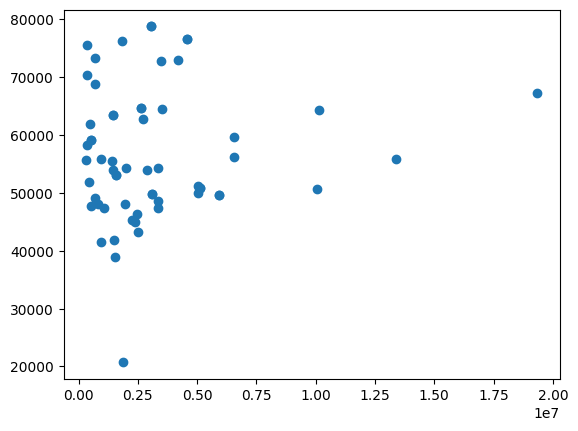

In [15]:
plt.scatter(df['Women'], df['Income'])
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [ ]:
df.columns
df.head(10)





,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06,62.89,28.75,0.29,1.25,0.05,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24,82.50,1.42,9.42,1.02,0.04,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72,73.49,18.28,0.23,1.41,0.04,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05,44.69,11.65,0.26,3.67,0.07,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229M_1444150F,1459229,1444150.0
6,0,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229M_1444150F,1459229,1444150.0
7,1,Vermont,626604,1.61,93.98,0.98,0.30,1.24,0.03,55602.97,308573M_318031F,308573,318031.0
8,2,Virginia,8256630,8.01,63.27,20.18,0.21,5.46,0.06,72866.01,4060948M_4195682F,4060948,4195682.0
9,3,Washington,6985464,11.14,72.04,3.38,1.41,7.02,0.61,64493.77,3487725M_3497739F,3487725,3497739.0


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

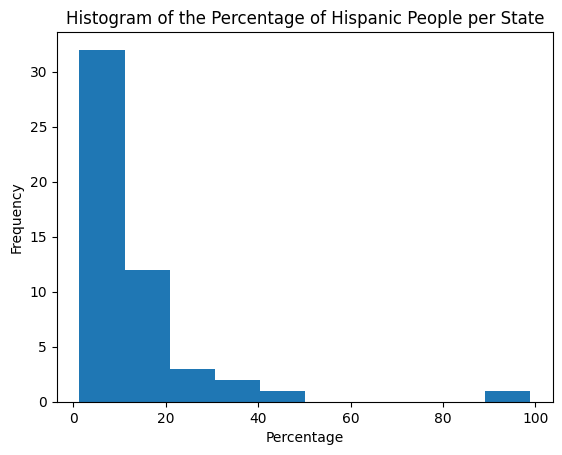

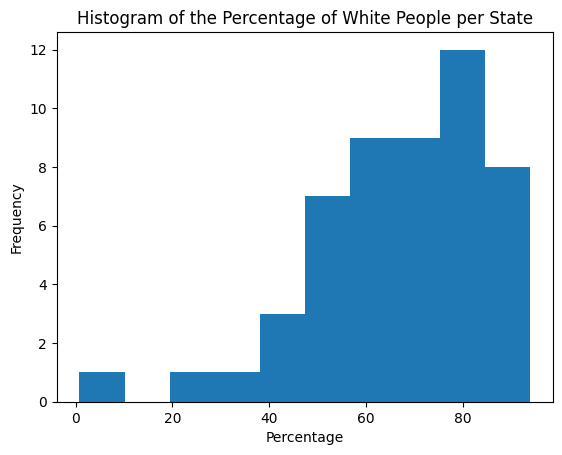

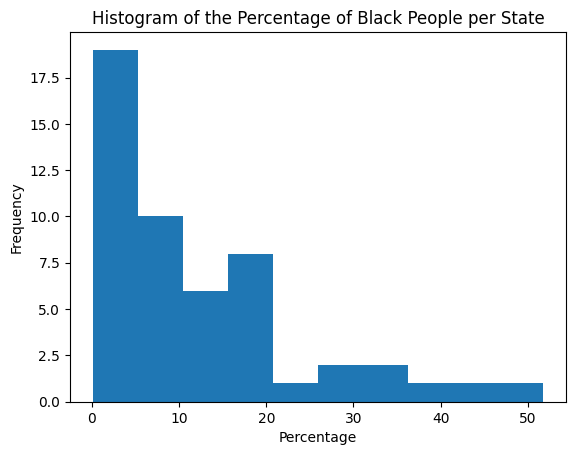

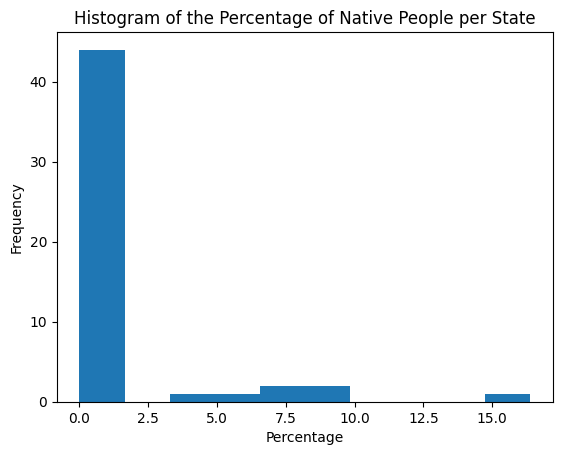

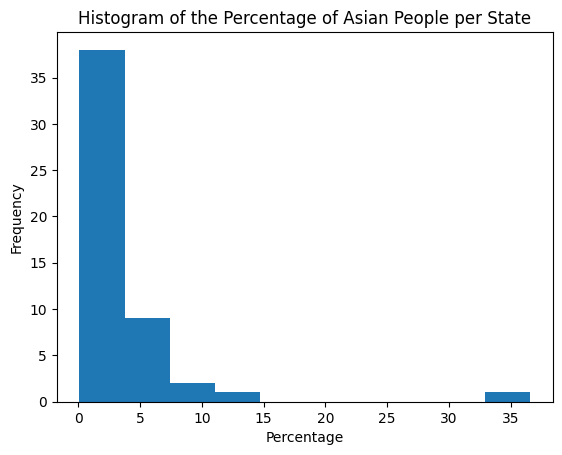

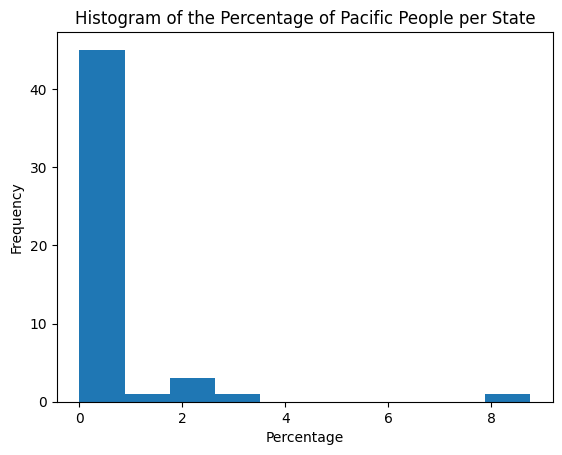

<Figure size 640x480 with 0 Axes>

In [27]:
for col in df.columns[3:9]:
    df[col] = df[col].str.replace('%', '')
    df[col] = pd.to_numeric(df[col])
df.head(10)

df['Pacific'] = df['Pacific'].fillna(100 - df['Hispanic'] - df['White'] - df['Black'] - df['Native'] - df['Asian'])

census = df.drop_duplicates(subset = df.columns[1:])
census

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()